# TP2 : Diabetes

## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from numpy import linalg as LA
from scipy.linalg import svd
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import math as m
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import t

df = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv", header=None)

## Analyzing dataset

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,...,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,7.535450e-19,-1.507090e-17,5.494599e-20,-7.284269e-18,8.288995e-18,-2.712762e-17,1.971776e-17,8.540177e-18,1.029845e-17,4.018907e-18,...,-2.260635e-18,-2.637408e-17,-5.023634e-19,-1.538488e-17,5.525997e-18,3.265362e-17,1.507090e-17,-4.034606e-18,1.205672e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00,25.000000
25%,-6.707870e-01,-7.128394e-01,-7.160981e-01,-6.715474e-01,-6.732232e-01,-6.951004e-01,-6.986587e-01,-6.387691e-01,-6.666746e-01,-6.930021e-01,...,-6.885118e-01,-5.793321e-01,-6.282190e-01,-6.190946e-01,-7.359866e-01,-6.374872e-01,-6.472739e-01,-7.025578e-01,-6.378171e-01,87.000000
50%,3.819503e-02,6.217421e-02,4.739406e-02,6.565749e-05,-6.111315e-03,-1.345167e-02,-4.823057e-02,4.016636e-02,6.047571e-04,3.602406e-02,...,-2.994795e-02,2.540540e-02,-2.229024e-02,-6.087758e-03,7.677091e-03,-3.123603e-03,2.444578e-02,-4.187834e-02,-8.099075e-02,140.500000
75%,6.748497e-01,6.244547e-01,6.975121e-01,6.881971e-01,7.026457e-01,7.155790e-01,7.200217e-01,5.788436e-01,6.298078e-01,6.629150e-01,...,6.672697e-01,6.676636e-01,5.985077e-01,7.406183e-01,7.000447e-01,6.440062e-01,6.313916e-01,6.929876e-01,7.249269e-01,211.500000
max,2.547051e+00,2.567177e+00,2.965824e+00,3.057612e+00,3.173713e+00,3.137950e+00,3.199205e+00,3.616718e+00,3.099090e+00,3.032505e+00,...,2.677458e+00,2.806877e+00,3.255462e+00,2.811911e+00,2.838960e+00,3.351254e+00,2.734481e+00,3.637684e+00,2.710260e+00,346.000000


### Question 1

In [4]:
df.shape

(442, 211)

### Question 2

In [5]:
print ("Les covariables ont pour variance :")
df.std(axis=0,ddof=0)

Les covariables ont pour variance :


0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
5       1.000000
6       1.000000
7       1.000000
8       1.000000
9       1.000000
10      1.000000
11      1.000000
12      1.000000
13      1.000000
14      1.000000
15      1.000000
16      1.000000
17      1.000000
18      1.000000
19      1.000000
20      1.000000
21      1.000000
22      1.000000
23      1.000000
24      1.000000
25      1.000000
26      1.000000
27      1.000000
28      1.000000
29      1.000000
         ...    
181     1.000000
182     1.000000
183     1.000000
184     1.000000
185     1.000000
186     1.000000
187     1.000000
188     1.000000
189     1.000000
190     1.000000
191     1.000000
192     1.000000
193     1.000000
194     1.000000
195     1.000000
196     1.000000
197     1.000000
198     1.000000
199     1.000000
200     1.000000
201     1.000000
202     1.000000
203     1.000000
204     1.000000
205     1.000000
206     1.000000
207     1.000000
208     1.0000

(array([24., 70., 66., 46., 48., 44., 34., 30., 36., 26., 13.,  5.]),
 array([ 25.  ,  51.75,  78.5 , 105.25, 132.  , 158.75, 185.5 , 212.25,
        239.  , 265.75, 292.5 , 319.25, 346.  ]),
 <a list of 12 Patch objects>)

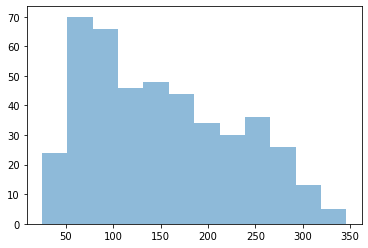

In [6]:
plt.hist(df[210], bins=12, alpha=0.5)

In [7]:
u = np.random.randint(0,210,4)
#u=np.random.choice(range(210),4, replace=False)
df1 = df[u]
y=df.iloc[:,-1]
df1['y']=y

### Analyse pour 4 covariables choisies au hasard + la variable explicative

In [8]:
#Espérance
print("L'espérance des covariables :\n",round(df[u].mean(),2))
print("\nL'espérance de la variable explicative est:",np.mean(y))

L'espérance des covariables :
 103   -0.0
42    -0.0
22     0.0
183    0.0
dtype: float64

L'espérance de la variable explicative est: 152.13348416289594


In [9]:
### Variance
print("La variance de la variable explicative est :", round(y.var()))
print("\nLa variance des covariables :\n",df1.std(axis=0,ddof=0))

La variance de la variable explicative est : 5943

La variance des covariables :
 103     1.000000
42      1.000000
22      1.000000
183     1.000000
y      77.005746
dtype: float64


Text(0, 0.5, 'Variance')

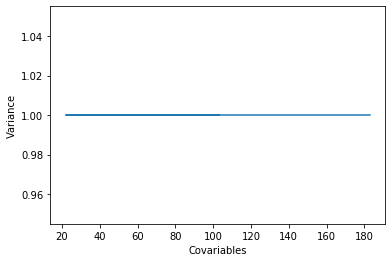

In [10]:
plt.figure()
plt.plot(round(df[u].var()))
plt.xlabel("Covariables")
plt.ylabel("Variance")

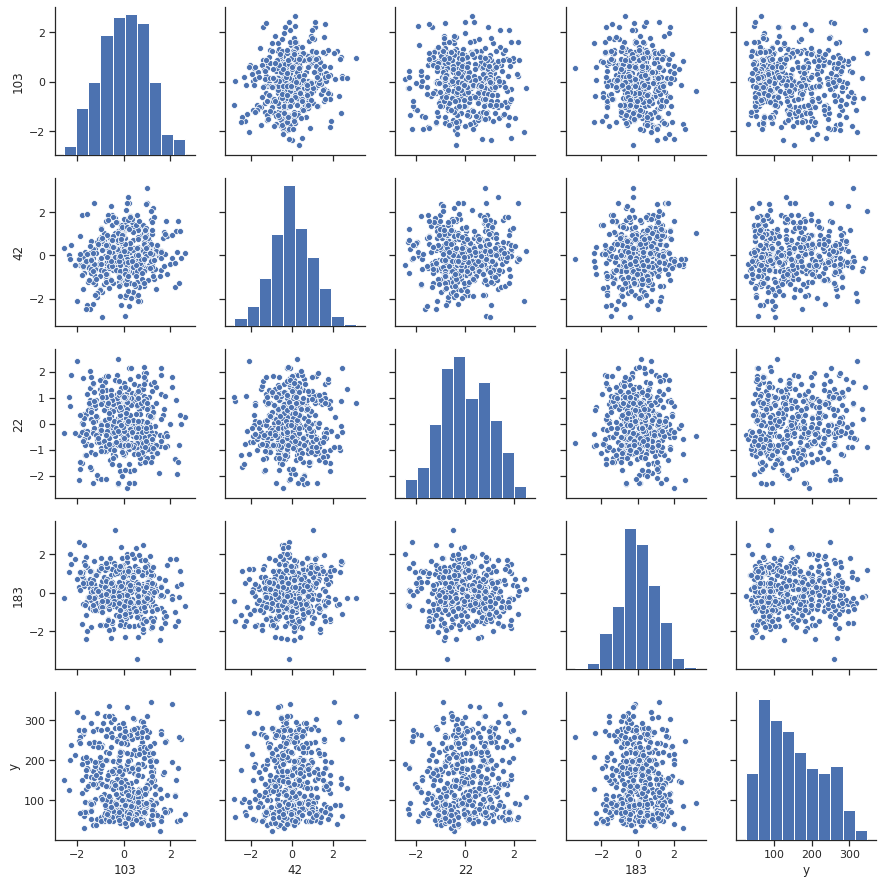

In [11]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df1, palette="husl")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9b265b828>,
      dtype=object)

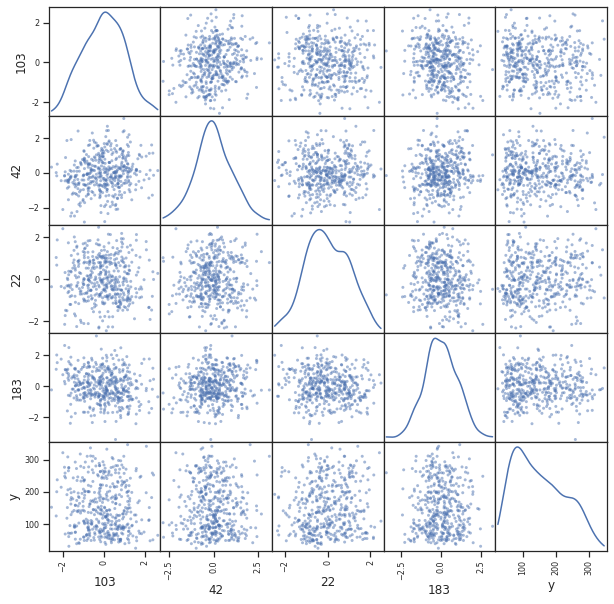

In [12]:
%matplotlib inline
scatter_matrix(df1, alpha = 0.5, figsize = (10, 10), diagonal = 'kde')

## Question 3
### Echantillon d’apprentissage et de test. 
On crée 2 échantillons : Xtrain (80%) et Xtest (20%)

In [13]:
#Taille des échantillons
df1=df.iloc[:,0:210]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df1, y, test_size=0.2)
print("Taille de Xtrain : ",Xtrain.shape)
print("Taille de Xtest : ",Xtest.shape)

Taille de Xtrain :  (353, 210)
Taille de Xtest :  (89, 210)


In [14]:
# Matrice de covariance
cov_matrix=Xtrain.cov()
cov_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,1.001218,-0.168548,-0.049125,-0.271596,0.161294,0.138390,-0.088918,-0.185722,-0.010045,-0.030847,...,-0.165115,-0.082352,0.002089,0.008699,-0.060403,-0.021121,-0.114304,0.021531,0.131349,-0.097596
1,-0.168548,0.973690,0.078914,-0.244848,-0.094179,-0.126965,0.139272,-0.049331,-0.018680,-0.103941,...,-0.113739,-0.029934,-0.046975,-0.226596,-0.014876,0.028701,-0.014343,-0.112692,-0.069354,0.094245
2,-0.049125,0.078914,0.987560,-0.172146,0.126273,-0.077857,-0.080227,0.076010,-0.104193,-0.191812,...,0.126474,0.024483,0.101165,0.052065,-0.000437,0.084379,-0.011776,-0.318341,0.024272,-0.103947
3,-0.271596,-0.244848,-0.172146,1.031987,0.025316,-0.075374,0.197208,-0.108186,0.110209,0.024493,...,0.135936,0.036366,-0.133623,0.145657,-0.007281,-0.219356,0.136202,-0.033291,-0.166118,-0.413953
4,0.161294,-0.094179,0.126273,0.025316,1.040609,-0.011798,0.043486,0.164723,-0.026097,0.156230,...,0.189170,0.021347,0.133214,-0.080835,-0.135102,-0.128562,0.006313,0.021899,0.025921,-0.077930


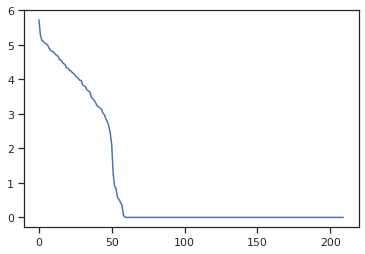

In [15]:
#SVD de la matrice de covariance
u, s, vh = np.linalg.svd(cov_matrix)
plt.plot(s)

In [16]:
df1=df1.iloc[0:60,:]
v160=df1
v160.shape

(60, 210)

## Question 4
### Graphe de décroissance des valeurs propres de la matrice de corrélation

In [17]:
#Matrice de correlation
corr=Xtrain.corr()

#Calcul des valeurs propres et vecteurs propres
e=np.linalg.eigh(corr)
vecteurs_propres=np.linalg.eigh(corr)[1]

Text(0.5, 1.0, 'Décroissance valeurs propres')

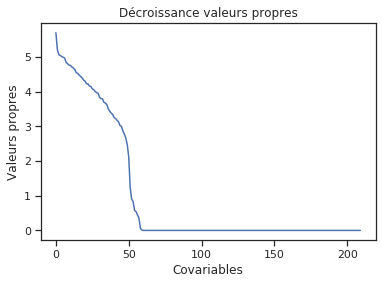

In [18]:
#Graphe de décroissance des valeurs propres
plt.figure()
plt.plot(sorted(e[0],reverse=True))
plt.xlabel("Covariables")
plt.ylabel("Valeurs propres")
plt.title("Décroissance valeurs propres")

In [19]:
V160=vecteurs_propres[150:]
V160.shape

(60, 210)

## Question 5
### PCA before OLS
On applique OLS avec Ytrain et X_PCA = XtrainV160, où V(1:60) contient les vecteurs propres (associés aux 60 plus grandes valeurs propres) de la matrice de covariance.

On fait une régression linéaire (avec intercept), puis on trace les valeurs des coefficients (hors intercept).

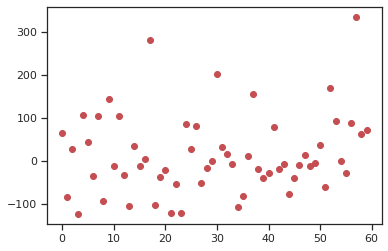

In [20]:
X_PCA=np.dot(Xtrain,np.transpose(V160))
lin_reg_PCA = linear_model.LinearRegression(fit_intercept=True)
lin_reg_PCA.fit(X_PCA , Ytrain)
plt.figure()
plt.plot(lin_reg_PCA.coef_,'ro')

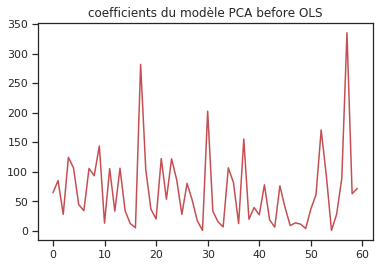

In [21]:
plt.plot(abs(lin_reg_PCA.coef_),'r')
plt.title('coefficients du modèle PCA before OLS')
plt.show()

### Méthode des moindres carrés classique.

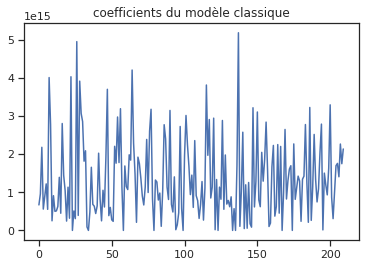

In [22]:
lr = LinearRegression()
lr.fit(Xtrain,Ytrain)
plt.plot(abs(lr.coef_))
plt.title('coefficients du modèle classique')
plt.show()

Text(0.5, 1.0, 'OLS')

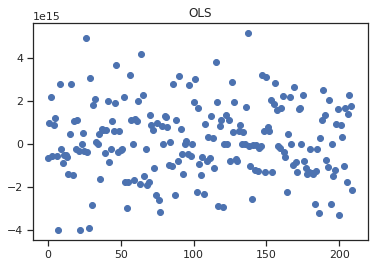

In [23]:
lin_reg_OLS = linear_model.LinearRegression()
lin_reg_OLS.fit(Xtrain, Ytrain)
plt.figure()
plt.plot(lin_reg_OLS.coef_,'bo')
plt.title("OLS")

## Question 6

In [24]:
#Valeur des intercepts pour les régressions précédentes
print("Intercept before OLS :", round(lin_reg_PCA.intercept_,2))
print("Intercept OLS classique :",round(lin_reg_OLS.intercept_,2))
#Valeur moyenne de la variable Ytrain
ymean=np.mean(Ytrain)
print("La valeur moyenne de la variable Y (sur le train set) :",round(ymean,2))

Intercept before OLS : 149.62
Intercept OLS classique : 149.0
La valeur moyenne de la variable Y (sur le train set) : 150.29


In [25]:
# Standardisation (centrage) et réduction des variables après PCA
X_PCA_centr= scale(X_PCA)
lin_reg_PCA_centr = linear_model.LinearRegression()
lin_reg_PCA_centr.fit(X_PCA_centr, Ytrain)
print("Intercept après PCA et standardisation :",round(lin_reg_PCA_centr.intercept_,2))

Intercept après PCA et standardisation : 150.29


## Question 7
### Résidus échantillon test pour PCA before OLS

Text(0.5, 1.0, 'Residus de la prédiction PCA sur l’échantillon test')

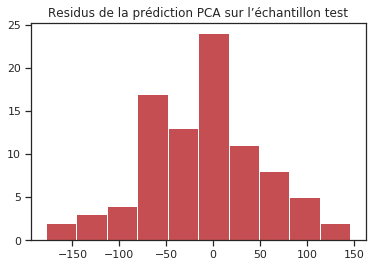

In [26]:
#Résidus PCA

Xtest_PCA=np.dot(Xtest,np.transpose(V160))
Ypredict_PCA=lin_reg_PCA.predict(Xtest_PCA)
residu_PCA=Ypredict_PCA-Ytest

plt.figure()
plt.hist(residu_PCA, color="r")
plt.title("Residus de la prédiction PCA sur l’échantillon test")

In [27]:
#Coefficient de détermination sur l’échantillon test
R2_acp=r2_score(Ytest,Ypredict_PCA)
print("Le coefficient de détermination :",round(R2_acp,2))

Le coefficient de détermination : 0.36


In [28]:
#Risque de prédiction sur l’échantillon test
#risque_prediction_PCA=(np.linalg.norm(residu_PCA))
risque_prediction_PCA=mean_squared_error(Ytest,Ypredict_PCA)
print("Le risque de prédiction est : ",round(risque_prediction_PCA,2))

Le risque de prédiction est :  4084.73


### Résidus échantillon test  OLS

Text(0.5, 1.0, 'Residus échantillon test OLS')

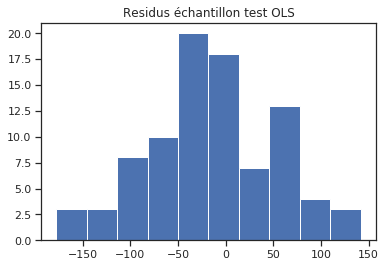

In [29]:
#Résidus OLS
X_OLS=Xtrain
lin_reg_OLS = linear_model.LinearRegression()
lin_reg_OLS.fit(X_OLS, Ytrain)
Ypredict_OLS=lin_reg_OLS.predict(Xtest)
residu_OLS=Ypredict_OLS-Ytest

plt.hist(residu_OLS,color="b")
plt.title("Residus échantillon test OLS")

In [30]:
#Coefficient de détermination sur l’échantillon test
R2_OLS=r2_score(Ytest,Ypredict_OLS)
print("Le coefficient de détermination :",round(R2_OLS,2))

Le coefficient de détermination : 0.28


In [31]:
#Risque de prédiction sur l’échantillon test
risque_prediction_OLS=mean_squared_error(Ytest,Ypredict_OLS)
print("Le risque de prédiction est : ",round(risque_prediction_OLS,2))

Le risque de prédiction est :  4625.29


## Question 8
### Forward variable selection
On peut appliquer la méthode vue dans le cours, à chaque boucle sur k, on selectionne la variable avec la plus grande p-valeur

In [32]:
diabetes_X_aug = np.column_stack((np.ones((Xtrain.shape[0], 1 )), Xtrain )) 
p = diabetes_X_aug.shape[1]
n = diabetes_X_aug.shape[0]

test = np.zeros((p,p))
pval_mem = np.zeros(p)
pval = np.zeros((p,p))
resids = Ytrain

var_sel = []
var_remain = list(range(p))
in_test = []

regr = linear_model.LinearRegression(fit_intercept=False)

for k in range(p): 
    resids_mem = np.zeros((p,n))
    for i in var_remain:
        xtmp = diabetes_X_aug [:,[i]]
        regr.fit(xtmp , resids)
        #calcul de (x'x)
        xx = np.sum( diabetes_X_aug [:,[i]] ** 2 )   

        resids_mem [i,:] = regr.predict(xtmp) - resids
        sigma2_tmp = np.sum (resids_mem [i,:] ** 2) / (xx)

        test[k,i] = np.sqrt(n-1) * np.abs(regr.coef_) / (np.sqrt( sigma2_tmp )) 
        pval[k,i] =   2 * (1 - norm.cdf(test[k,i]))

    #separe en deux vecteurs la liste des variables séléctionnées et les autres
    best_var = np.argmax(test[k,:])
    var_sel.append(best_var)
    resids = resids_mem[best_var,:]
    pval_mem [k] = pval[k,best_var]
    var_remain = np.setdiff1d(var_remain,var_sel)

var_sel1=[x-1 for x in var_sel[1:]]
df=pd.DataFrame(var_sel1)
df.columns = ['Variables sélectionnées']
print ("La sélection des variables ordonnée : \n", df.head())


La sélection des variables ordonnée : 
    Variables sélectionnées
0                       58
1                      123
2                      133
3                      167
4                      129


## Question 9
### (i) Graphes des statistiques lors de la sélection des variables
Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1

In [33]:
var_select_ca=np.array(var_sel)[pval_mem<0.1]
var_ca=[x-1 for x in var_select_ca[1:]]
print("Les variables sélectionnées avec critère d'arrêt: \n " , var_ca)

Les variables sélectionnées avec critère d'arrêt: 
  [58, 123, 133, 167, 129, 31, 54, 208, 85, 17, 135, 159, 209]


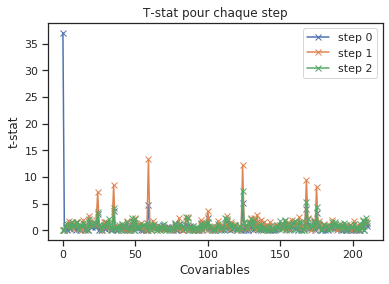

In [34]:
def lab(s):
    return "step %s" % s

fig = plt.figure()
for s in range(3): 
    plt.plot(np.arange(p),test[s,:], '-x',label = lab(s))
    
plt.legend()
plt.title("T-stat pour chaque step")
plt.xlabel("Covariables")
plt.ylabel("t-stat")
plt.show()

### (ii) Graphes des statistiques lors de la sélection des variables

Text(0.5, 0, 'steps')

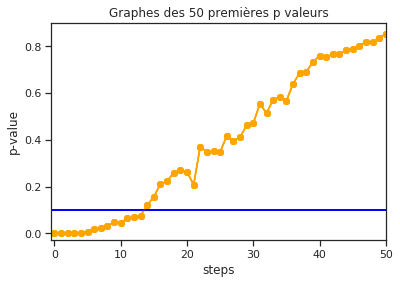

In [35]:
for k in range(3): 
    plt.plot(np.arange(p),pval_mem, '-o', color = "orange" )
    plt.plot([-0.5,50],[.1,.1],color = "blue" )
    plt.axis(xmin = -.5,xmax = 50,ymin = -.03,ymax=0.9)
plt.title("Graphes des 50 premières p valeurs")
plt.ylabel("p-value")
plt.xlabel("steps")

## Question 10
### OLS sur les variables sélectionnées

In [36]:
lin_reg_selec = linear_model.LinearRegression()
lin_reg_selec.fit(Xtrain.iloc[:,list(var_ca)] , Ytrain)
Ypredict_selec=lin_reg_selec.predict(Xtest.iloc[:,list(var_ca)])

### Risque de prédiction obtenu sur l’échantillon test
residu=Ytest-Ypredict_selec
risque_prediction=np.linalg.norm(residu)
risque_prediction_selec=mean_squared_error(Ytest,Ypredict_selec)
print("Le risque de prédiction est :",round(risque_prediction_selec,2))

Le risque de prédiction est : 3926.92


In [37]:
### Comparaison avec ceux de OLS et PCA before OLS
print("Les risques de prédiction :\n")
print("PCA before OLS :", round(risque_prediction_PCA,2))
print("OLS :", round(risque_prediction_OLS,2))
print("Forward selection :", round(risque_prediction_selec,2))

Les risques de prédiction :

PCA before OLS : 4084.73
OLS : 4625.29
Forward selection : 3926.92


## Question 11
### Validation croisée
- Split de l'échantillon train en 4 folds de façon aléatoire
- Affichage des numéros d’échantillon sélectionnés dans chaque fold

In [38]:
kf = KFold(4, shuffle=True)
a=kf.get_n_splits(Xtrain)
kf.split(Xtrain.values)
sample_train=[]
for  i, data  in enumerate(kf.split(Xtrain)):
    print("\nEchantillon {:.0f} :".format(i+1))
    sample_train.append(data[1])
    print(data[1])


Echantillon 1 :
[  6   7  13  14  22  23  29  32  33  35  37  49  52  58  67  69  73  76
  77  78  93  99 100 106 111 113 114 122 128 132 133 144 146 147 150 151
 152 153 154 157 159 161 171 173 179 180 181 183 188 194 199 202 203 204
 207 208 212 213 216 217 226 229 240 241 243 251 257 258 260 274 285 299
 311 312 313 317 318 320 321 325 326 331 332 335 336 338 341 343 347]

Echantillon 2 :
[  3   8   9  10  17  18  25  26  30  31  41  47  53  55  57  59  60  61
  62  64  70  72  74  80  83  84  88  90  91  94 101 103 109 110 112 116
 119 130 136 137 138 148 149 166 168 174 177 178 185 187 190 191 192 205
 206 209 210 215 218 219 222 234 237 238 242 253 255 256 261 263 273 275
 278 280 281 283 284 286 289 293 295 298 304 305 309 330 349 350]

Echantillon 3 :
[  0   2  11  12  16  21  27  39  40  46  63  65  66  71  79  81  85  86
  87  96  97  98 107 115 120 121 125 131 134 141 142 155 156 163 164 165
 167 172 176 182 186 193 197 200 211 214 220 223 225 227 230 231 232 233
 236 245 2

## Question 12
### Méthode de régression Ridge
- Pour le choix du paramètre de régularisation, validation croisée sur les ”folds” définis lors de la question précédente
- calcul du risque de prédiction et estimation du modèle
- Moyenne des 4 risques de prédiction
- Courbe du risque de validation croisée en fonction du paramètre de régularisation (choisir l’espace de définition pour le graphe). 
- Paramètre de régularisation optimal et valeur du risque sur le test

In [39]:
n_alphas = 200
alphas = np.logspace(0.1, 10, num=n_alphas)
r=[]
for alpha in alphas:
    ridge =  Ridge(alpha=alpha)
    risque = []
    for train_index, test_index in kf.split(Xtrain):
        X_train_c, X_traintest_c = Xtrain.iloc[train_index], Xtrain.iloc[test_index]
        y_train_c, y_traintest_c = Ytrain.iloc[train_index], Ytrain.iloc[test_index]
        ridge.fit(Xtrain, Ytrain)
        risque.append(mean_squared_error(ridge.predict(Xtest), Ytest))
    r.append(np.array(risque).mean())
    print('alpha :{:.2f} : moyenne des risques de prédiction: {:.2f}'.format(alpha, r[-1]))
    
alpha_ridge = alphas[np.argmin(risque)]
print("Alpha associé au risque minimum est :", alpha_ridge)

alpha :1.26 : moyenne des risques de prédiction: 4050.24
alpha :1.41 : moyenne des risques de prédiction: 4047.50
alpha :1.58 : moyenne des risques de prédiction: 4044.65
alpha :1.78 : moyenne des risques de prédiction: 4041.70
alpha :1.99 : moyenne des risques de prédiction: 4038.63
alpha :2.23 : moyenne des risques de prédiction: 4035.48
alpha :2.50 : moyenne des risques de prédiction: 4032.22
alpha :2.81 : moyenne des risques de prédiction: 4028.88
alpha :3.15 : moyenne des risques de prédiction: 4025.46
alpha :3.53 : moyenne des risques de prédiction: 4021.94
alpha :3.96 : moyenne des risques de prédiction: 4018.33
alpha :4.44 : moyenne des risques de prédiction: 4014.63
alpha :4.98 : moyenne des risques de prédiction: 4010.82
alpha :5.58 : moyenne des risques de prédiction: 4006.89
alpha :6.26 : moyenne des risques de prédiction: 4002.83
alpha :7.02 : moyenne des risques de prédiction: 3998.63
alpha :7.87 : moyenne des risques de prédiction: 3994.26
alpha :8.83 : moyenne des risqu

alpha :11609783.49 : moyenne des risques de prédiction: 6468.39
alpha :13018857.23 : moyenne des risques de prédiction: 6468.45
alpha :14598949.56 : moyenne des risques de prédiction: 6468.50
alpha :16370816.92 : moyenne des risques de prédiction: 6468.55
alpha :18357734.96 : moyenne des risques de prédiction: 6468.59
alpha :20585804.27 : moyenne des risques de prédiction: 6468.63
alpha :23084293.26 : moyenne des risques de prédiction: 6468.66
alpha :25886022.64 : moyenne des risques de prédiction: 6468.69
alpha :29027796.54 : moyenne des risques de prédiction: 6468.72
alpha :32550886.00 : moyenne des risques de prédiction: 6468.74
alpha :36501571.10 : moyenne des risques de prédiction: 6468.76
alpha :40931748.93 : moyenne des risques de prédiction: 6468.78
alpha :45899615.26 : moyenne des risques de prédiction: 6468.80
alpha :51470429.10 : moyenne des risques de prédiction: 6468.81
alpha :57717369.90 : moyenne des risques de prédiction: 6468.83
alpha :64722498.84 : moyenne des risques

In [40]:
residu_PCA

176    -91.412785
172    -73.936356
66      12.700634
338   -112.840365
372     10.674384
59      -8.955945
245     -5.066769
308    -23.884688
399    -32.974013
280    -80.987722
329    -37.616001
391     -1.084255
359   -138.957026
155     18.380941
146     14.183870
141   -178.281375
344    -63.264241
205    108.383058
241   -100.907486
36     -44.559062
393     -1.606865
4      -13.443562
91      -2.977082
96      12.645684
254     -8.234561
356     20.675554
63     -58.019447
277     88.868527
334     64.124398
33      58.744601
          ...    
62      21.837744
255    -55.401732
264     -4.572738
234     -5.639373
273    -65.320253
166    -31.994902
101    -42.141266
27     100.874077
217    -72.810130
367     33.561004
71     -42.624500
439    -24.887336
34       2.973141
25     -47.215058
417     96.491247
177     18.676412
20       3.193320
168    -64.537019
244    -77.757049
214     58.050684
102   -169.349504
73      21.273483
109      9.155154
126    -65.054212
406    -56

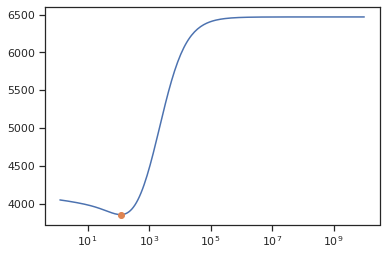

In [41]:
plt.plot(np.logspace(0.1,10, num=200),r)
plt.xscale('log')
plt.plot(np.logspace(0.1, 10, num=200)[r.index(min(r))],min(r), 'o')
plt.show()

In [42]:
# Paramètre de régularisation optimal et valeur du risque sur le test
rmin=Ridge(alpha=np.logspace(0.1, 10, num=200)[r.index(min(r))])
rmin.fit(Xtrain, Ytrain)
param_ridge = mean_squared_error(rmin.predict(Xtest), Ytest)
print('La valeur du risque sur le test :',param_ridge)

La valeur du risque sur le test : 3856.2925504130217


## Question 13
### LassoCV
- A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO.
- Donner le risque de prédiction associé.

In [43]:
lasso = LassoCV()
l=lasso.fit(Xtrain,Ytrain)
#print("score :",l.score(Xtrain,Ytrain))
error_lasso=mean_squared_error(lasso.predict(Xtrain), Ytrain)
alpha=lasso.alpha_
print("alpha: ",alpha)
print("le risque de prédiction: ",round(error_lasso))

alpha:  6.100264948960375
le risque de prédiction:  2985.0


## Question 14
### Variables selectionées par le lasso
- Appliquer la méthode Least-square LASSO aux variables sélectionnées

In [44]:
#print(lasso.coef_)
variables_lasso=np.nonzero(lasso.coef_)[0]

print("\nles variables sélectionnées sont :", variables_lasso)
print('le nombre de variables est : ',np.count_nonzero(lasso.coef_))
lasso_coeff=pd.Series(lasso.coef_)


les variables sélectionnées sont : [  8  58  85 112 123 129 135 159 167 168 174 208]
le nombre de variables est :  12


In [45]:
#linear regression
linear_lasso= linear_model.LinearRegression()
linear_lasso.fit(Xtrain[variables_lasso], Ytrain)

Ypredict=linear_lasso.predict(Xtest[variables_lasso])
m_s_error=mean_squared_error(Ypredict,Ytest)

print(f"Le risque de prédiction est : {round(m_s_error,3)}")

Le risque de prédiction est : 3250.919


## Question 15
### Méthode de regression non-linéaire : Decision Tree & Random Forest
+ On apprend les différents paramètres par validation croisée et l’on donne la valeur du risque de prédiction calculé sur l’échantillon test.

In [46]:
#Decision tree 
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
dtree.fit(Xtrain[variables_lasso], Ytrain)

Ypred_tree= dtree.predict(Xtest[variables_lasso])
m_s_error_tree=mean_squared_error(Ypred_tree,Ytest)

print(f"Le risque de prédiction est : {round(m_s_error_tree,3)}")

Le risque de prédiction est : 3886.172


In [47]:
#RF model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(Xtrain[variables_lasso], Ytrain) 
pred_train_rf= model_rf.predict(Xtest[variables_lasso])
#print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))

m_s_error_rf=mean_squared_error(pred_train_rf,Ytest)
print(f"Le risque de prédiction est : {round(m_s_error_rf,3)}")

Le risque de prédiction est : 3297.998
